# Experimento: Atividade 1 - Etapa 4 - Sem DL.

[Proposta On-line](https://docs.google.com/document/d/e/2PACX-1vQQ2A2PZbzVLz7PA0amF7gXN4tMSoGMXbZGpYphJNjSk158CR7jZ9gQWJ12U99xalHuQvSDfF022ypu/pub)

Utilizar modelos pré-treinados de aprendizagem profunda para identificação de segmentos de áudio com deglutições

## Lista de boas deglutições

In [2]:
import os
import glob
from IPython.display import Image, Audio, display

bons = [os.path.join('dataset/MP3/',os.path.basename(a).replace('.png','.mp3')) for a in glob.glob('Bons/*.png')]
for b in bons:
    display(b)
    display(Audio(b))

'dataset/MP3/a00028.mp3'

'dataset/MP3/a00073.mp3'

'dataset/MP3/a00083.mp3'

'dataset/MP3/a00111.mp3'

'dataset/MP3/a00112.mp3'

'dataset/MP3/a00115.mp3'

'dataset/MP3/a00133.mp3'

'dataset/MP3/a00180.mp3'

'dataset/MP3/a00183.mp3'

'dataset/MP3/a00376.mp3'

'dataset/MP3/a00393.mp3'

'dataset/MP3/a00397.mp3'

'dataset/MP3/a00443.mp3'

## Extraindo blocos de audio para análise

100%|██████████| 13/13 [00:00<00:00, 55.32it/s]


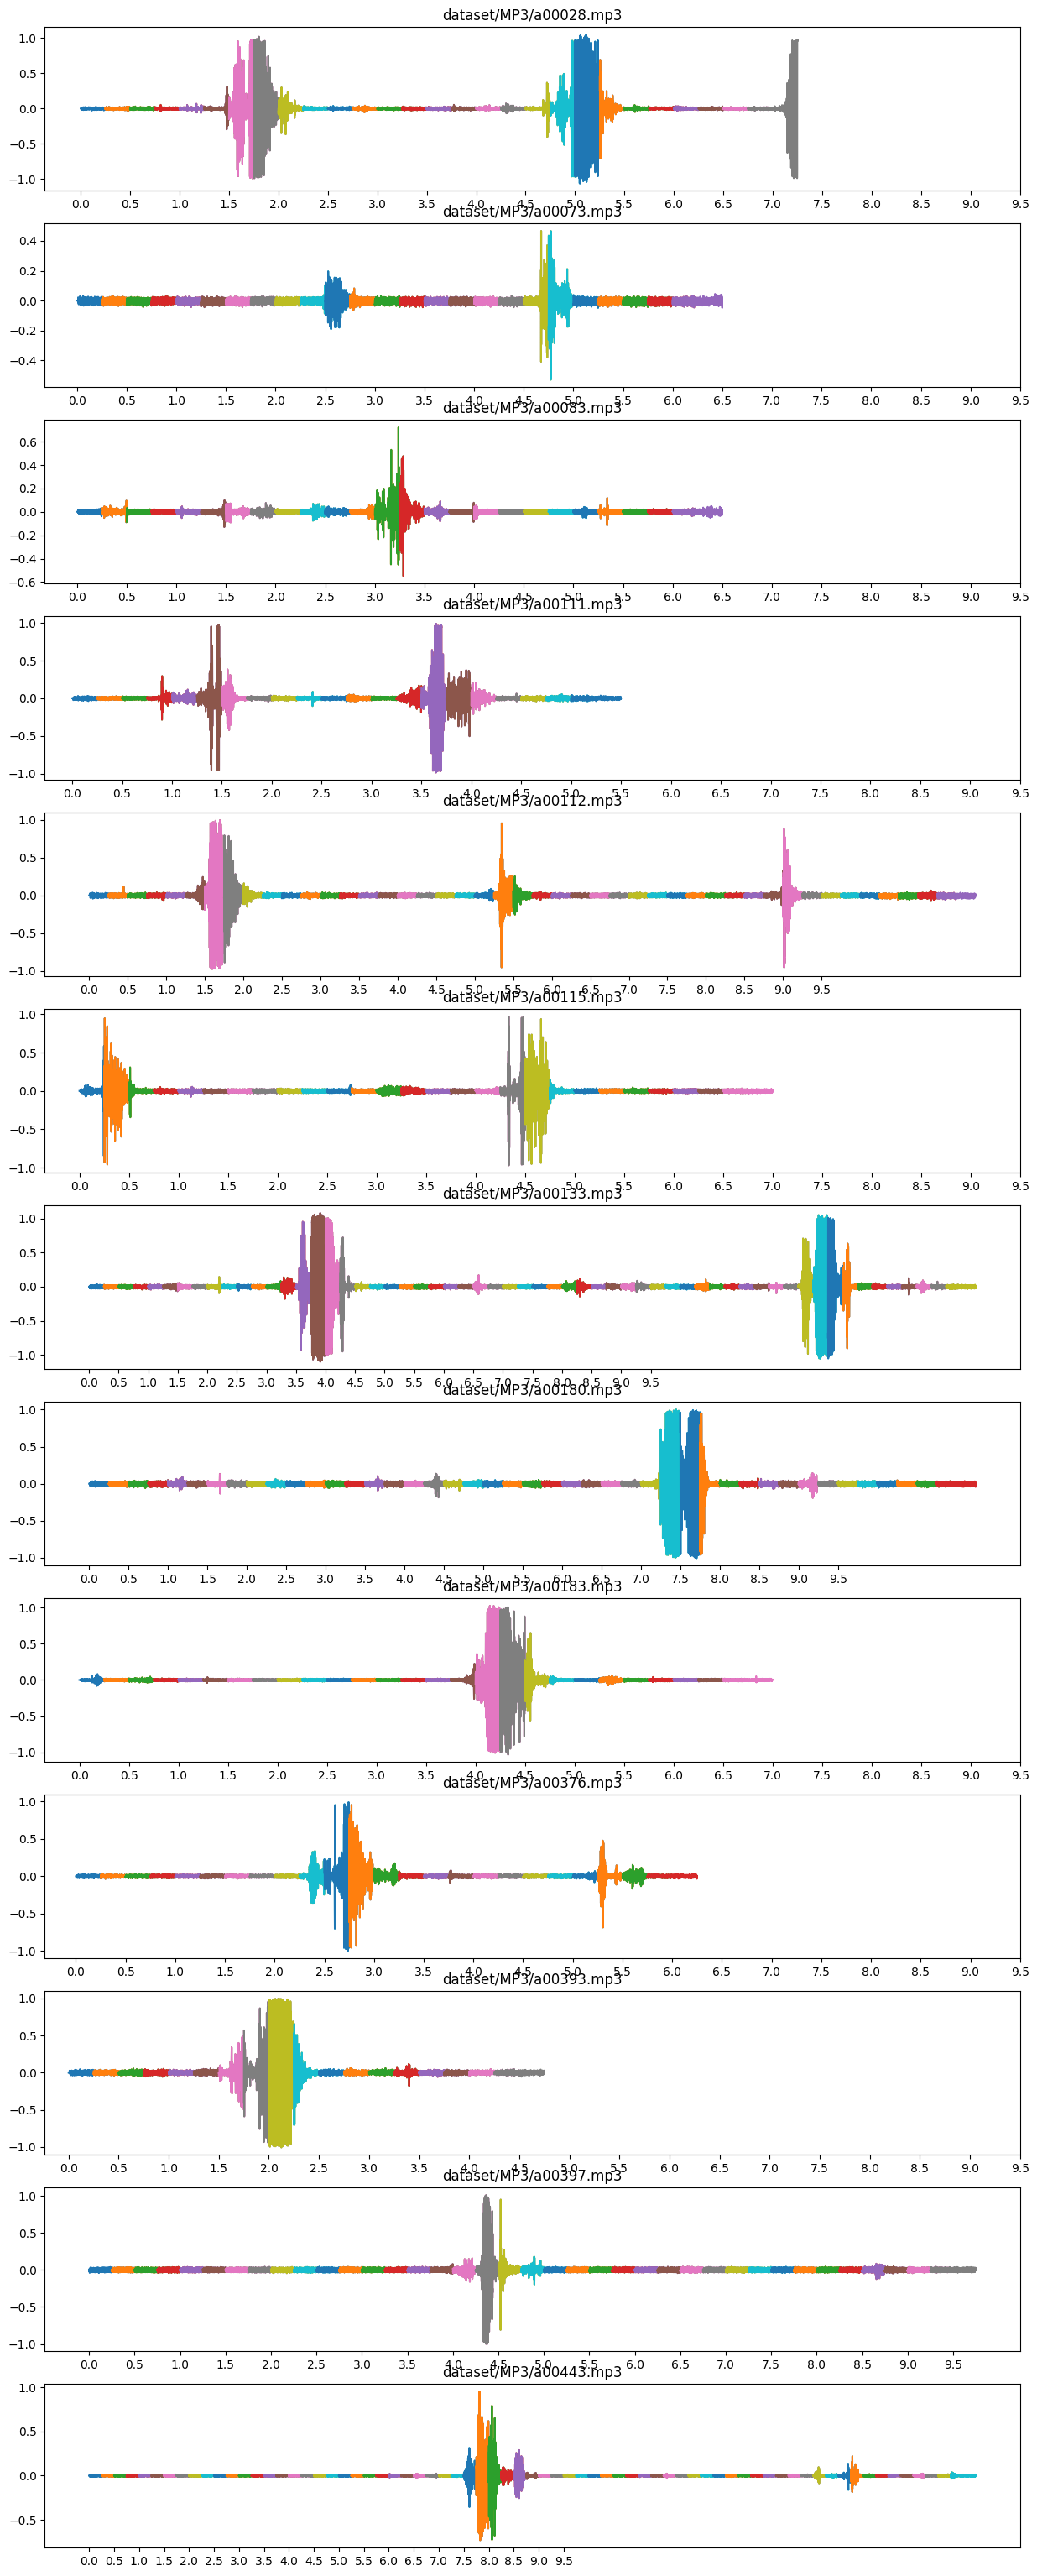

In [5]:
import librosa

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

dados = []
for b in tqdm(bons):
    nome = os.path.basename(b)[:-4]
    y, sr = librosa.load(b)
    x = np.arange(len(y))/sr

    janela = int(0.5 * sr)
    passo = int(0.25 * sr)

    linha = []
    for i in range(0, len(y), int(passo)):
        max = i + janela
        if max > len(y):
            break
        linha.append((x[i:max], y[i:max]))    
    dados.append(linha)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))




for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        ax[i].plot(x, y)
        ax[i].set_xticks(np.arange(0, 10, 0.5))
plt.show()

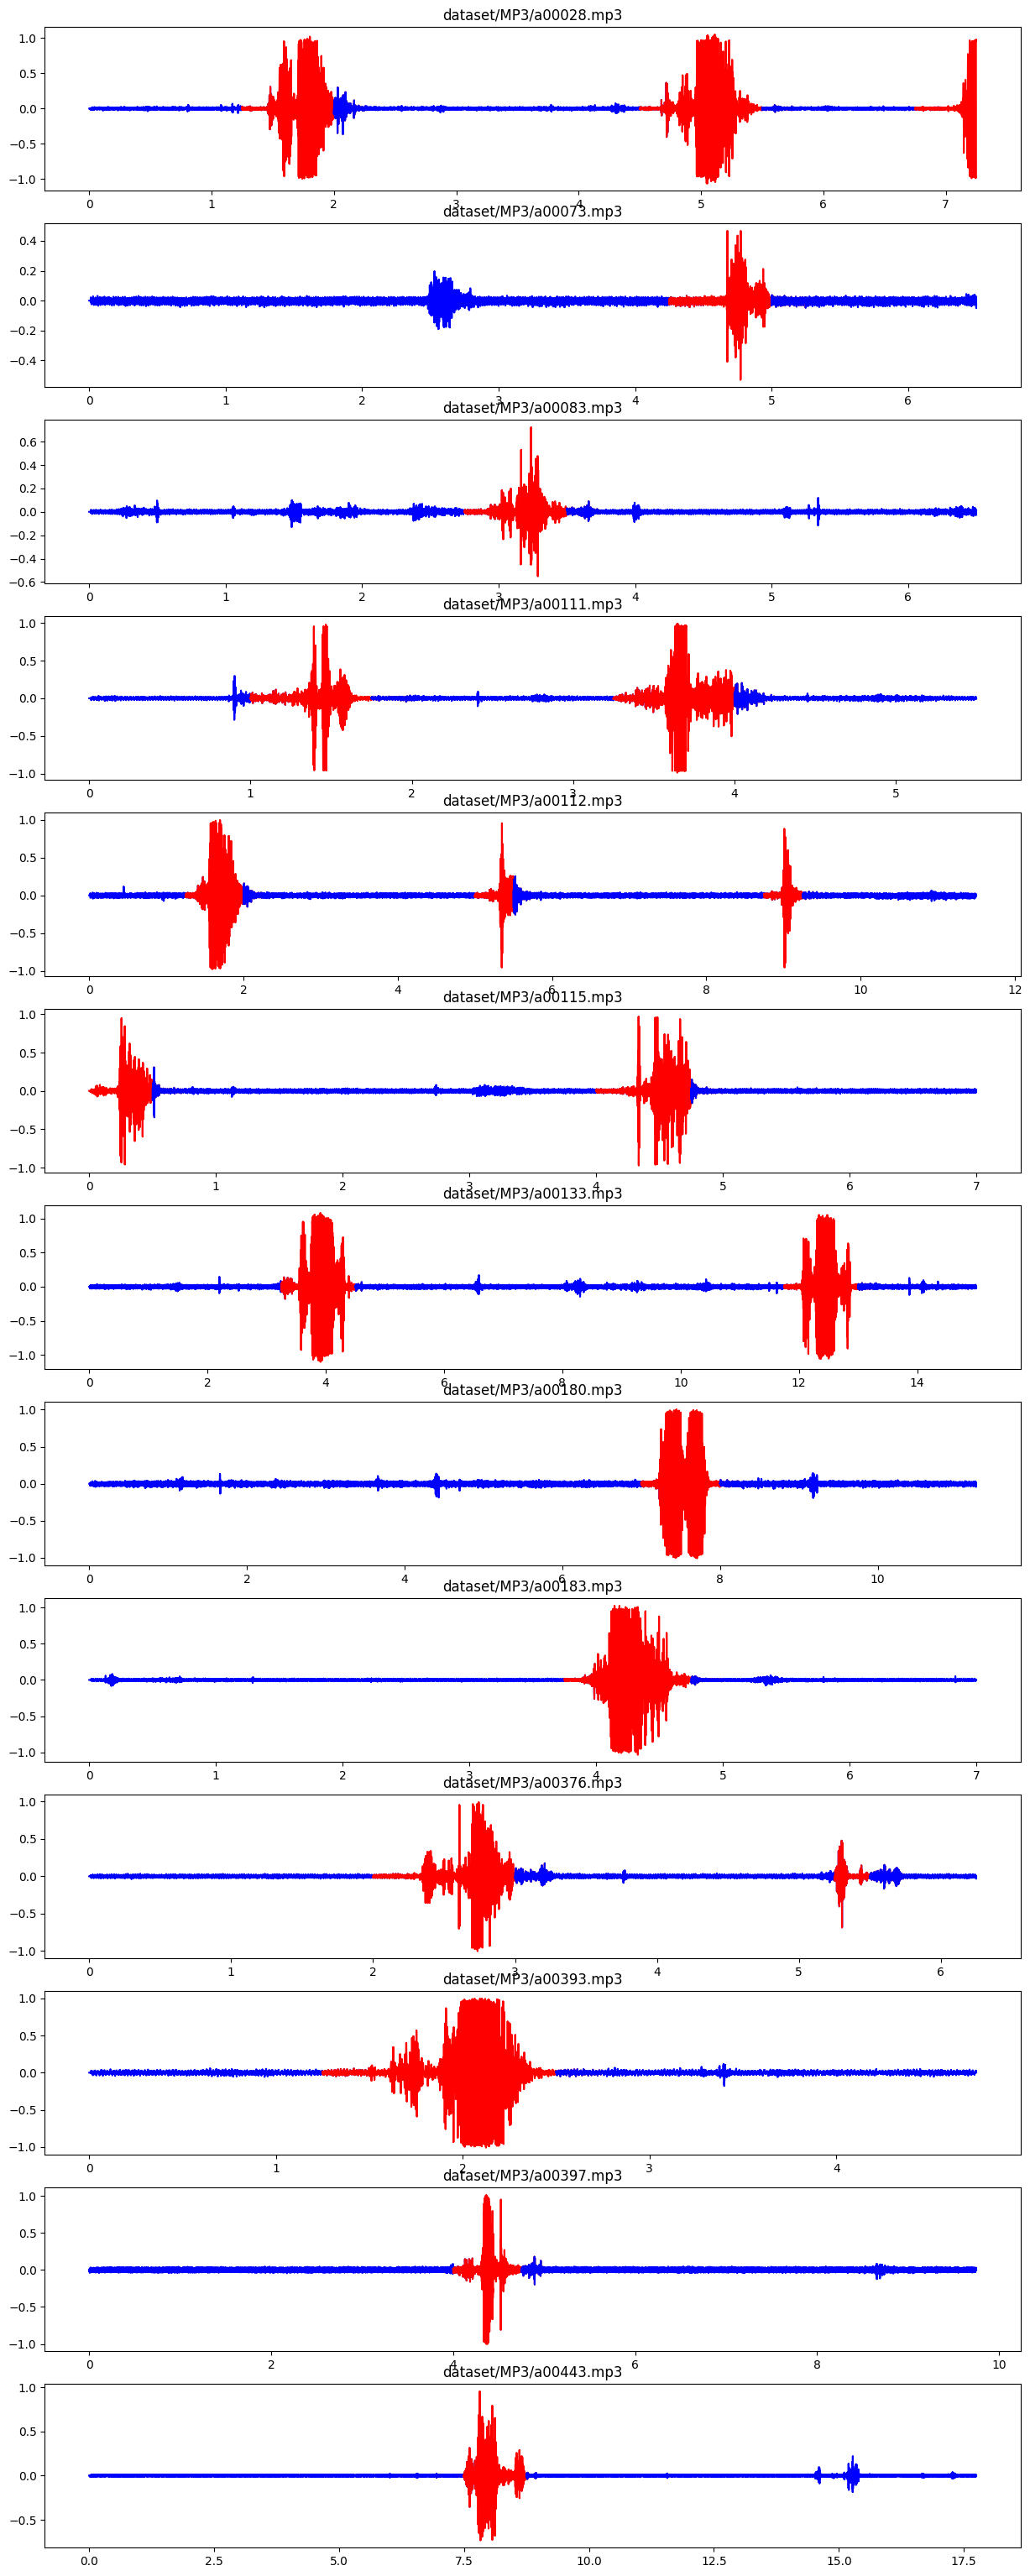

In [54]:
# detector de anomalias
from sklearn.ensemble import IsolationForest

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = IsolationForest(contamination=0.15)
clf.fit(X)
ano = clf.predict(X)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

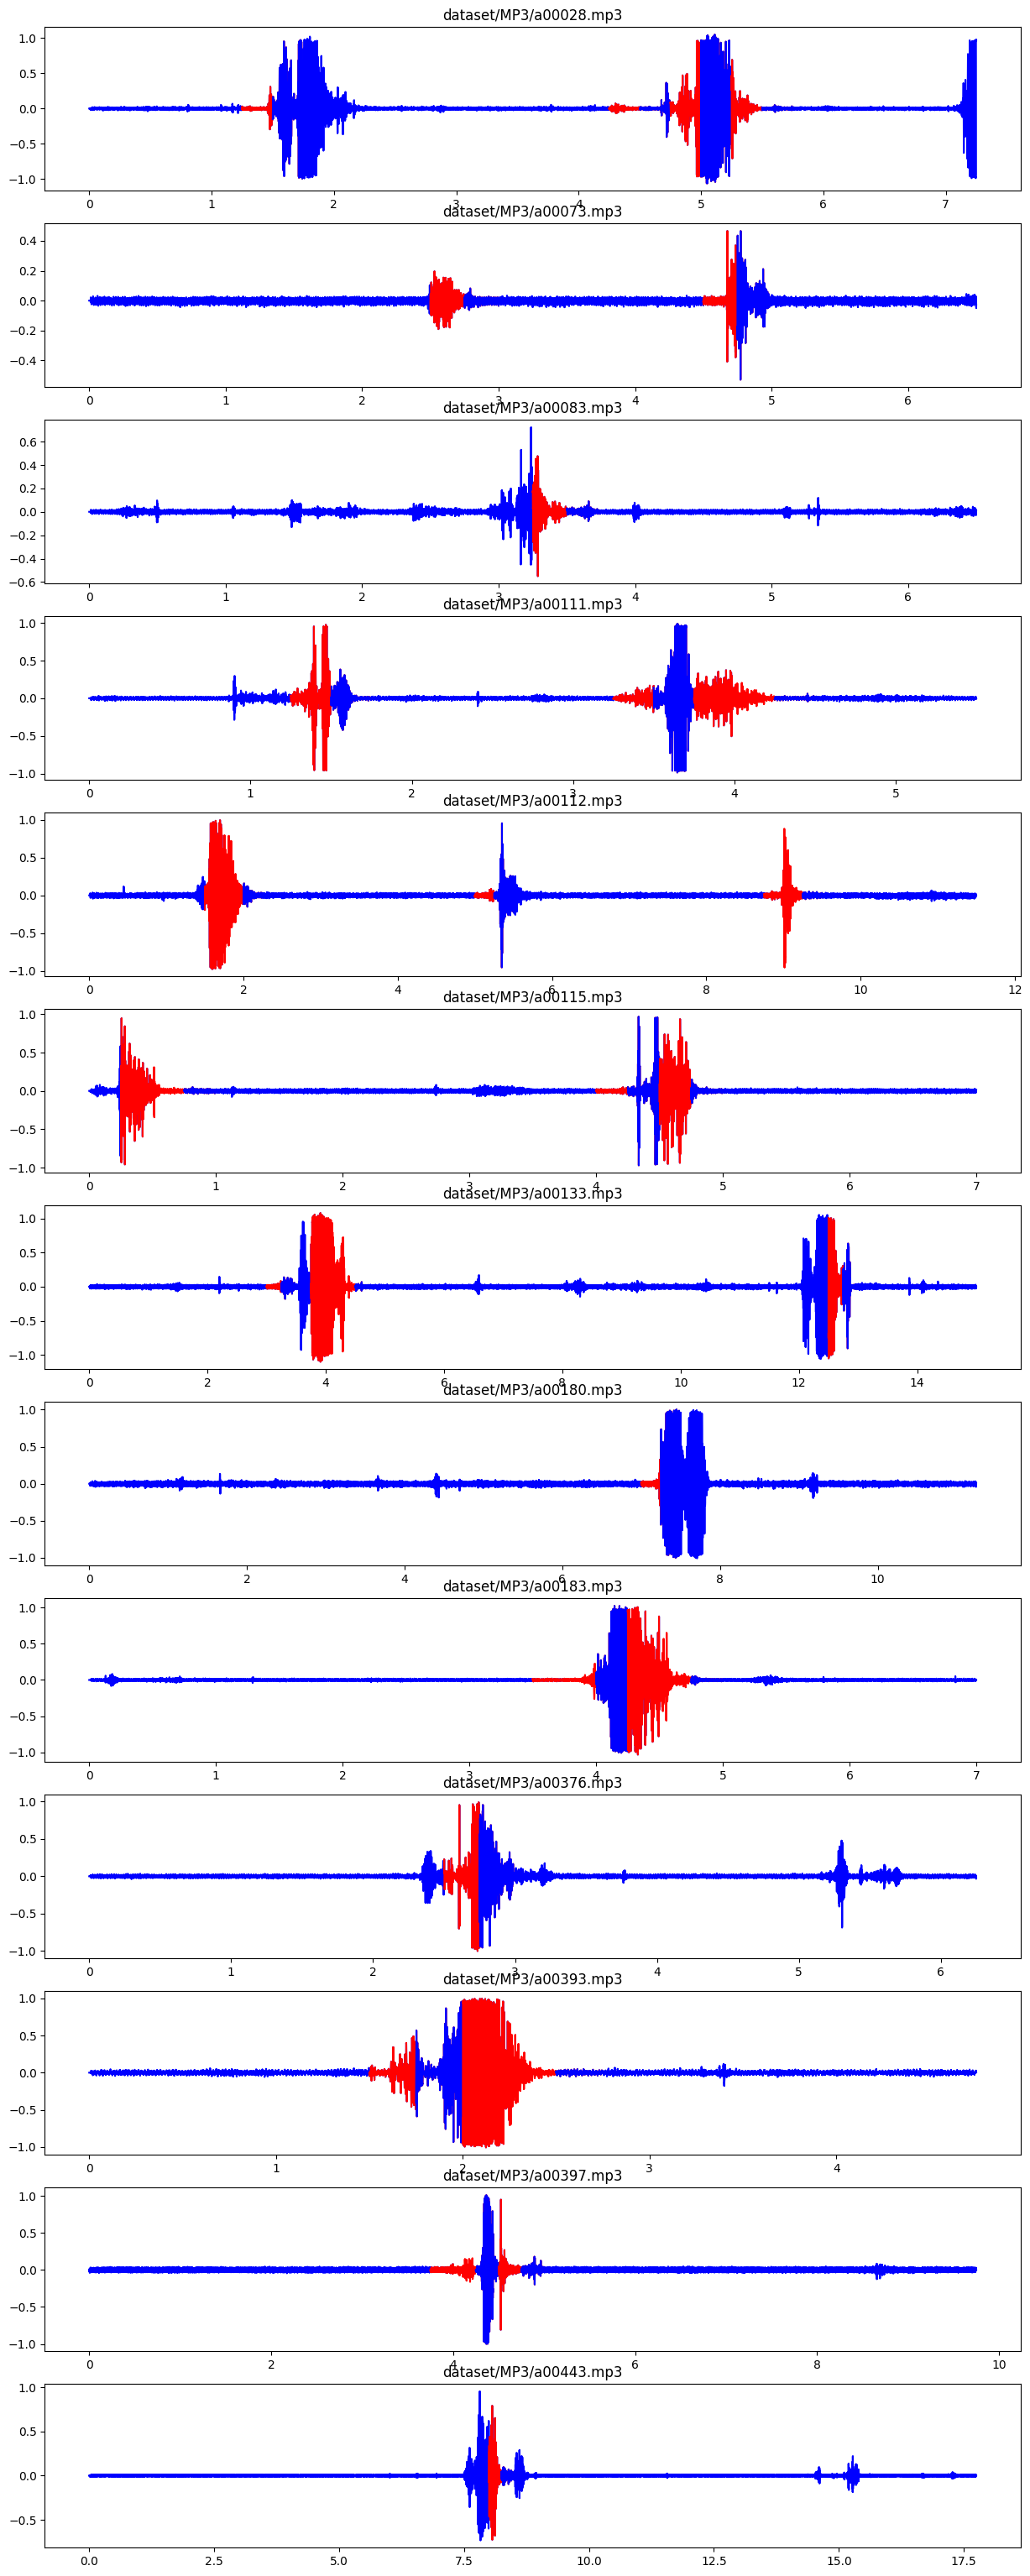

In [51]:
# detector de anomalias
from sklearn.svm import OneClassSVM

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X)
ano = clf.predict(X)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

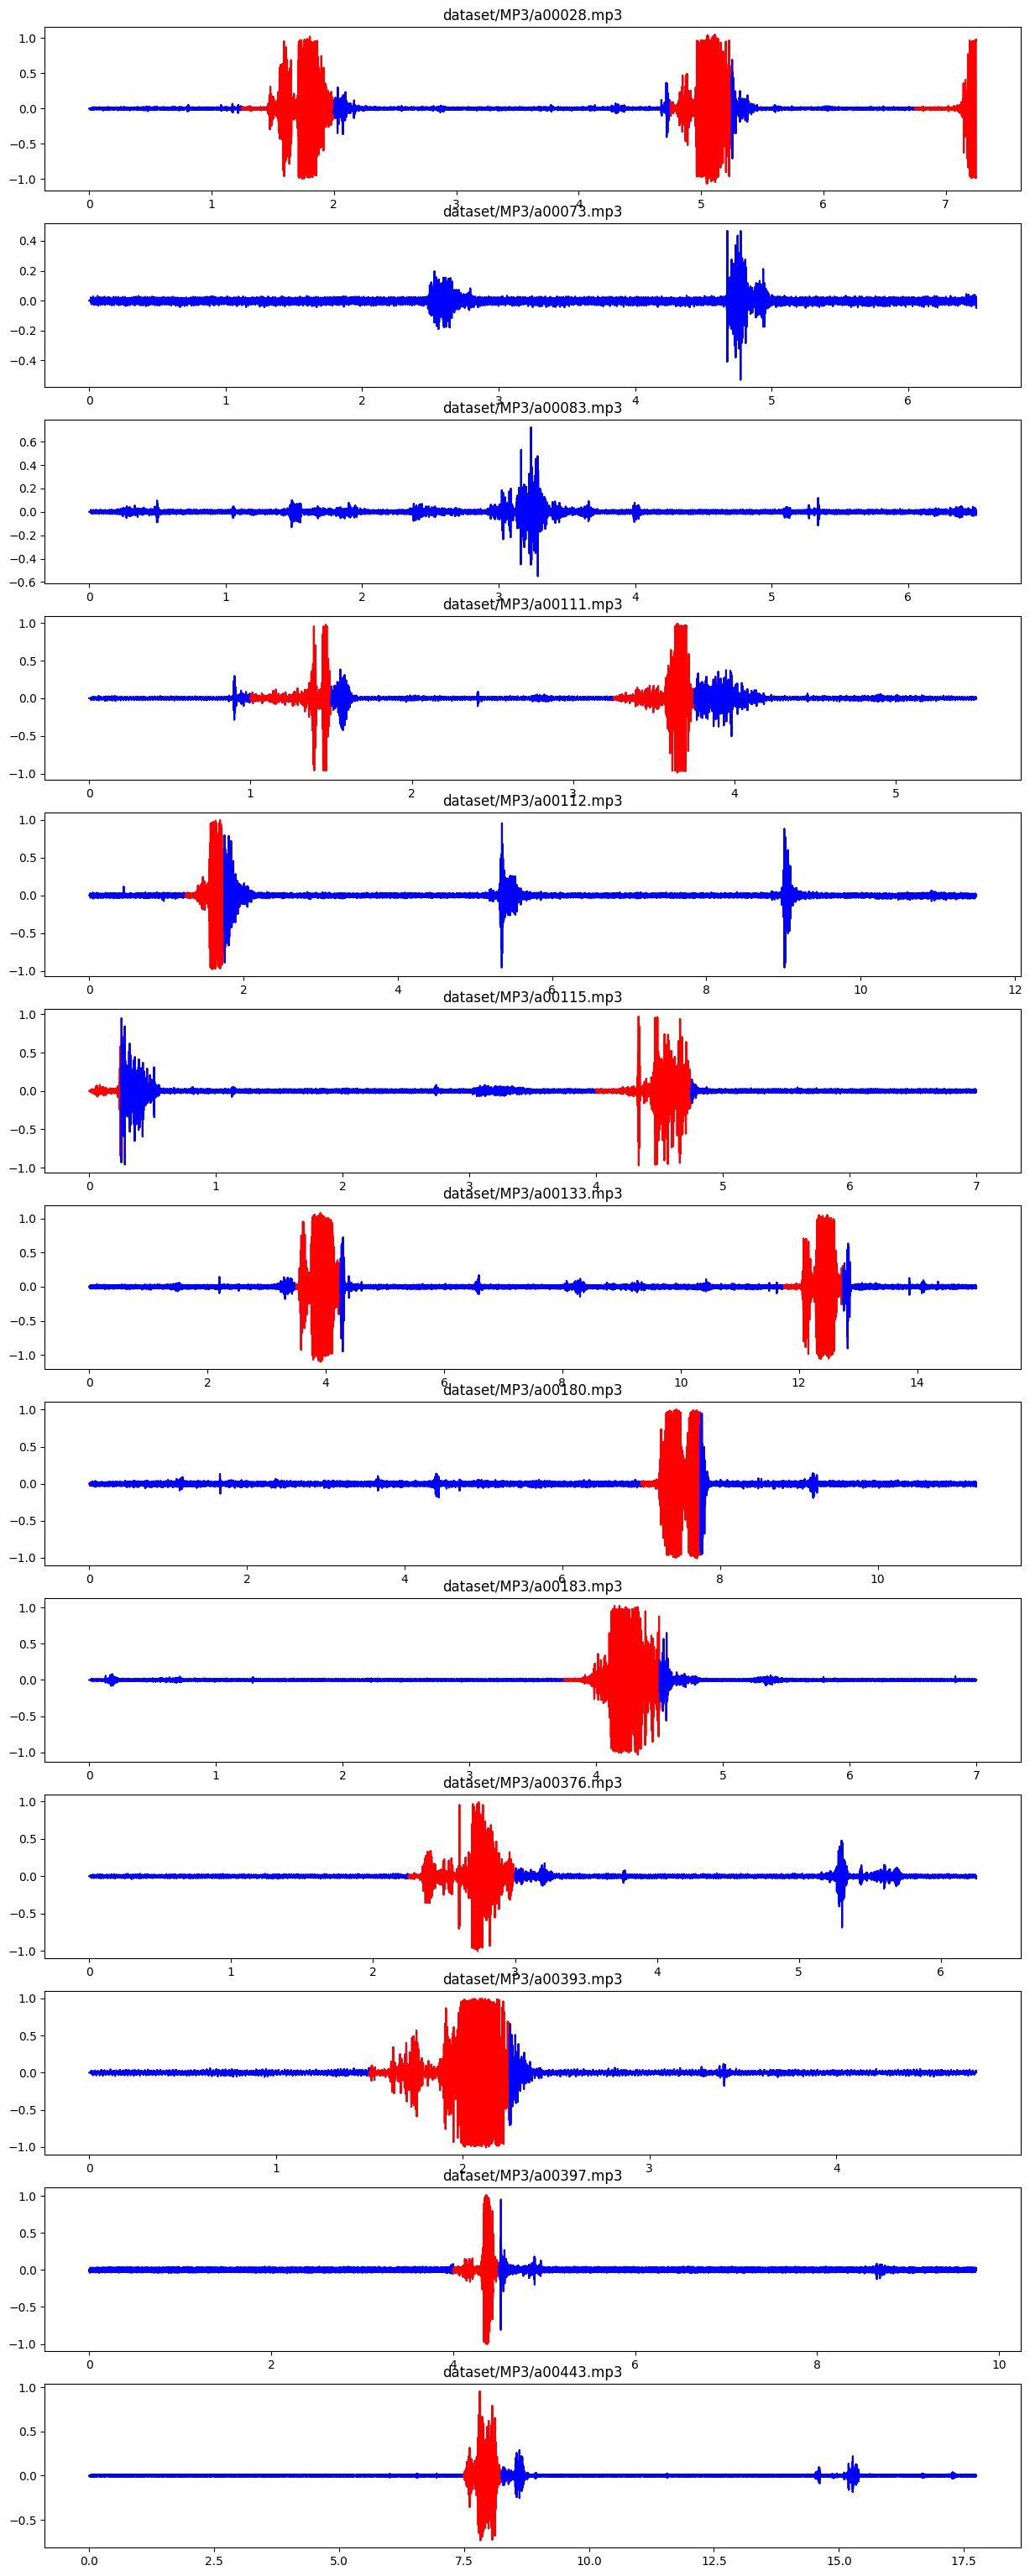

In [59]:
from sklearn.neighbors import LocalOutlierFactor

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = LocalOutlierFactor(contamination=0.1, novelty=True)
clf.fit(X)
ano = clf.predict(X)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

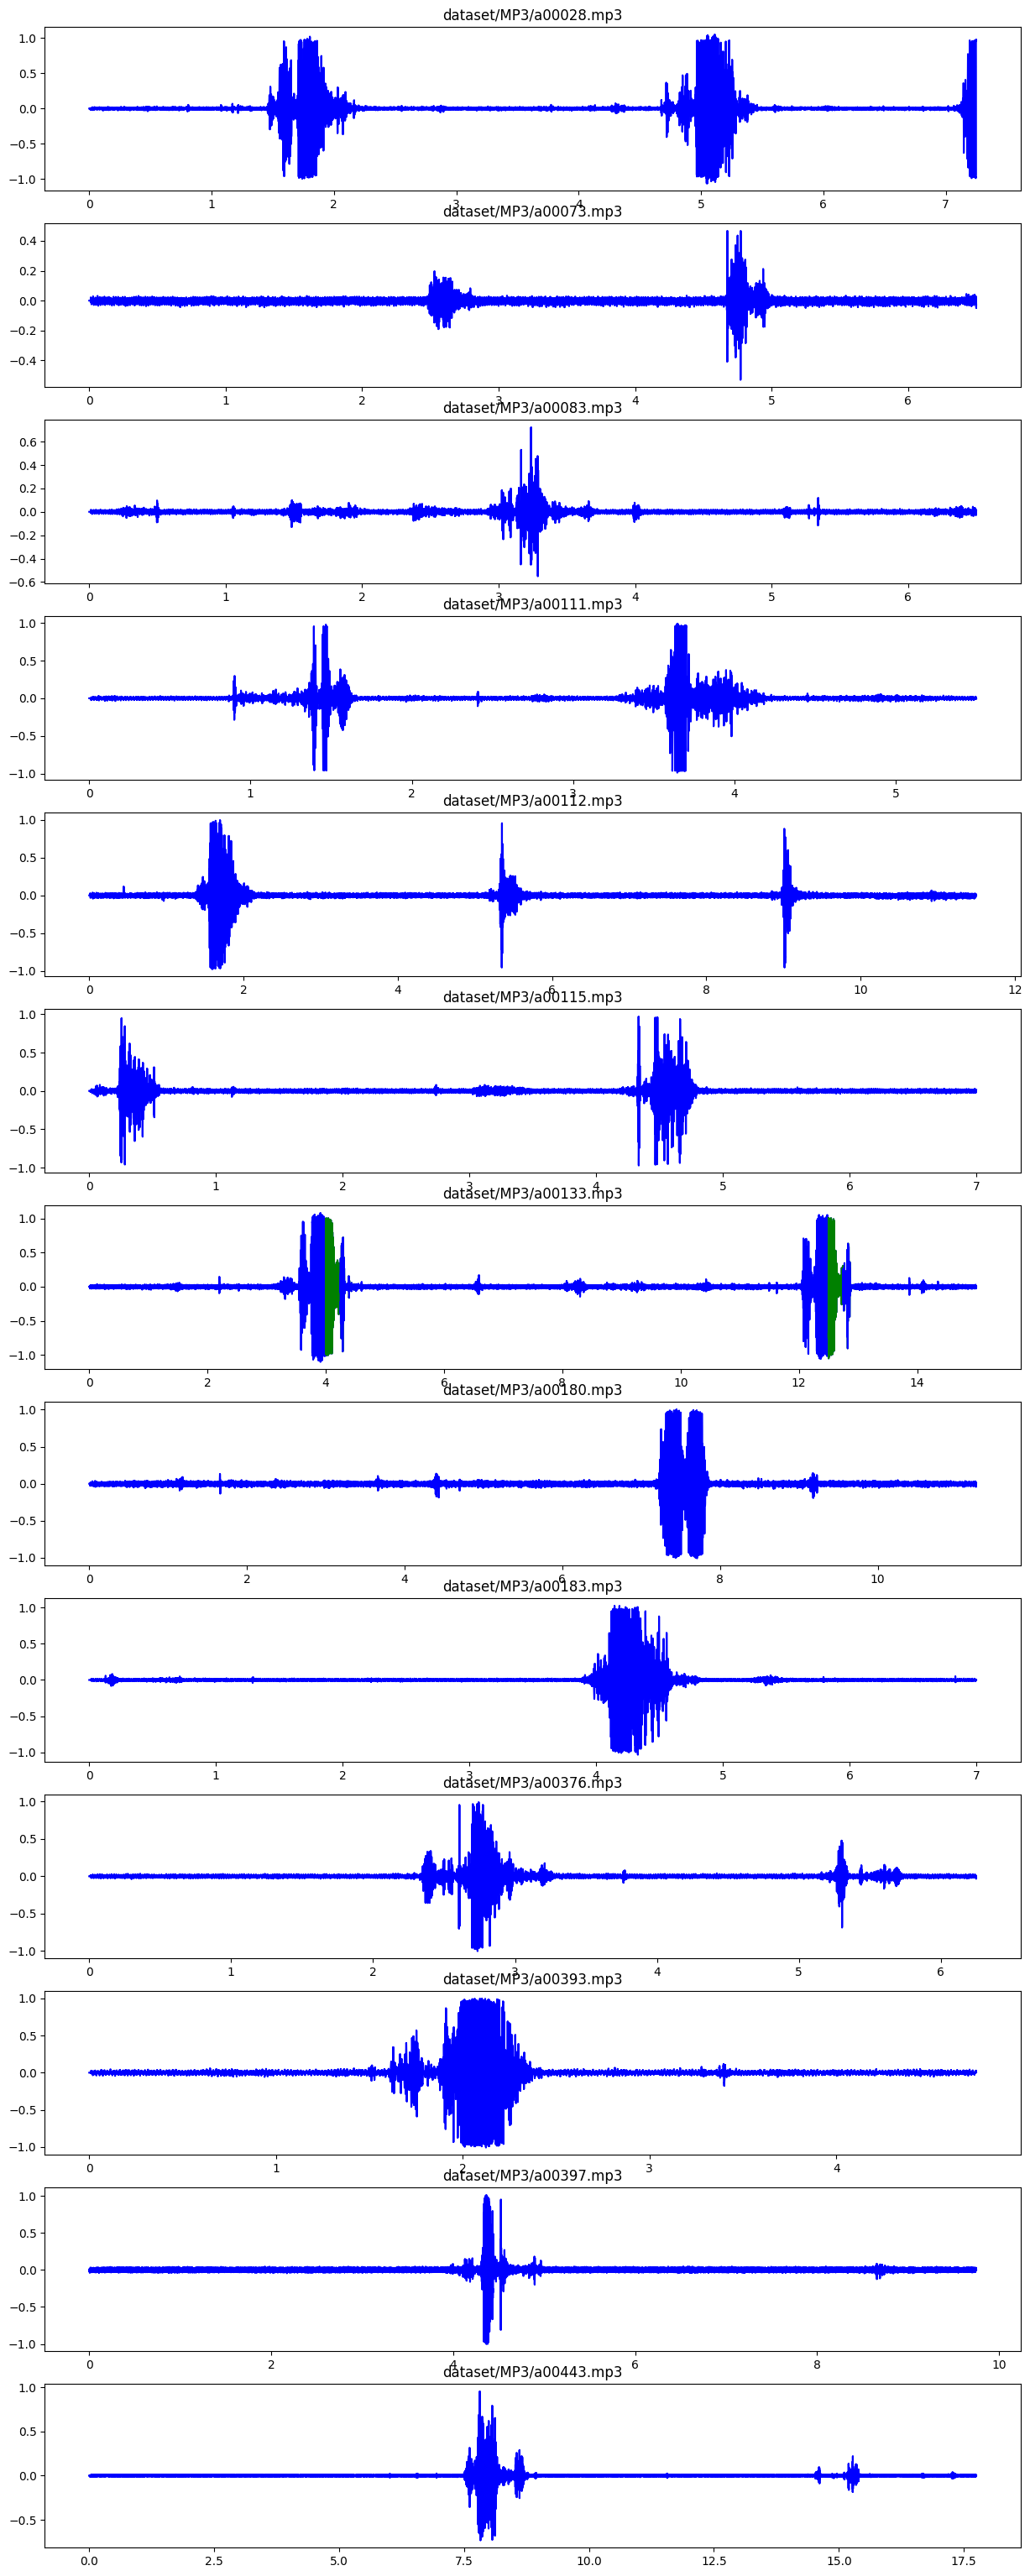

In [52]:
# agrupamento de dados
from sklearn.cluster import KMeans

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = KMeans(n_clusters=2, random_state=42)
clf.fit(X)
grupo = clf.predict(X)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
cores = ['b','g','r','c','m','y','k']
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color=cores[grupo[n]])

plt.show()

## ML Supervisionado Classificador

In [46]:
tutor = [
{"nome":"a00028", "d":[(1.5, 2.2), (4.7, 5.4)]},
{"nome":"a00073", "d":[(4.5, 5.1)]},
{"nome":"a00083", "d":[(3.1, 3.7)]},
{"nome":"a00111", "d":[(1.1, 1.7),(3.5,4.1)]},
]   
    

100%|██████████| 4/4 [00:00<00:00, 86.97it/s]


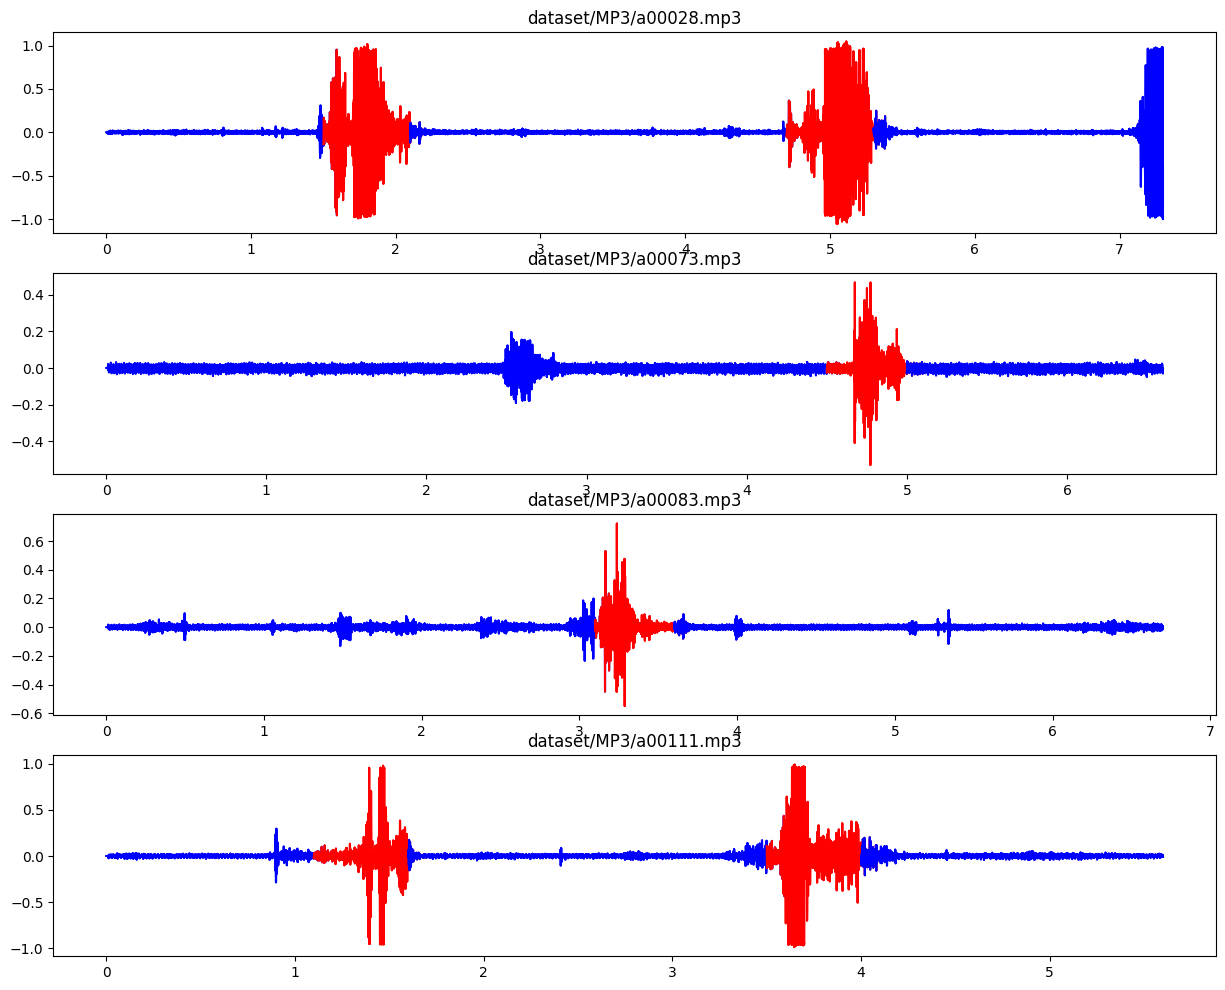

In [53]:
dados = []
for t in tqdm(tutor):
    nome = t['nome']
    nome = f'dataset\MP3\{nome}.mp3'
    y, sr = librosa.load(nome)
    x = np.arange(len(y))/sr

    janela = int(0.2 * sr)
    passo = int(0.1 * sr)

    linha = []
    for i in range(0, len(y), int(passo)):
        max = i + janela
        if max > len(y):
            break
        xp = x[i:max]
        yp = y[i:max]
        k = 0
        for ini, fim in t['d']:
            if xp[0]>=ini and xp[-1]<=fim:
                k = 1
                break

        linha.append((xp, yp, k))      

    dados.append(linha)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y, k in linha:
        n+=1
        ax[i].plot(x, y, color='red' if k == 1 else 'blue')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from time import time


X = []
y = []
for linha in dados:
    for a,b,c in linha:
        X.append(b)
        y.append(c)

print(len(X), y)


classificadores = [
    RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5),
    #GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    #HistGradientBoostingClassifier(max_iter=100, random_state=42, max_depth=5),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    ExtraTreeClassifier(max_depth=5, random_state=42),
    #MLPClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    LinearSVC(random_state=42),
    NuSVC(nu=0.1, random_state=42),
    GaussianNB(),
]

resp = []
for clf in classificadores:
    t0 = time()
    scores = cross_val_score(clf, X, y, cv=5, scoring='f1',n_jobs=-1)
    t1 = time()
    print(clf.__class__.__name__, 'F1:', sum(scores)/len(scores))
    resp.append({'tecnica':clf.__class__.__name__, 'f1':sum(scores)/len(scores),'tempo':t1-t0})

import pandas as pd

df = pd.DataFrame(resp)
df.sort_values('f1', ascending=False)

258 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RandomForestClassifier F1: 0.6952747252747253
DecisionTreeClassifier F1: 0.4879209679209679
ExtraTreeClassifier F1: 0.638997668997669
LogisticRegression F1: 0.266031746031746
SVC F1: 0.7335042735042734
LinearSVC F1: 0.289

,tecnica,f1,tempo
4,SVC,0.733504,0.281001
7,GaussianNB,0.726838,0.208004
0,RandomForestClassifier,0.695275,0.869992
6,NuSVC,0.694615,0.314948
2,ExtraTreeClassifier,0.638998,0.174939
1,DecisionTreeClassifier,0.487921,0.694063
5,LinearSVC,0.289899,0.299049
3,LogisticRegression,0.266032,0.238999


In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from time import time


X = []
y = []
for linha in dados:
    for a,b,c in linha:
        X.append(b)
        y.append(c)

print(len(X),len(X[0]), y)

#X = RobustScaler().fit_transform(X)

pca = PCA(random_state=42)
Xr = pca.fit_transform(X)

print(len(Xr),len(Xr[0]), y)

classificadores = [
    RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5),
    #GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    #HistGradientBoostingClassifier(max_iter=100, random_state=42, max_depth=5),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    ExtraTreeClassifier(max_depth=5, random_state=42),
    #MLPClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    LinearSVC(random_state=42),
    NuSVC(nu=0.1, random_state=42),
    GaussianNB(),
]

resp = []
for clf in classificadores:
    t0 = time()
    scores = cross_val_score(clf, Xr, y, cv=5, scoring='f1',n_jobs=-1)
    t1 = time()
    print(clf.__class__.__name__, 'F1:', sum(scores)/len(scores))
    resp.append({'tecnica':clf.__class__.__name__, 'f1':sum(scores)/len(scores),'tempo':t1-t0})

import pandas as pd

df = pd.DataFrame(resp)
df.sort_values('f1', ascending=False)

258 4410 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
258 258 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,tecnica,f1,tempo
0,RandomForestClassifier,0.772564,0.341010
7,GaussianNB,0.743160,0.032019
4,SVC,0.733504,0.047982
6,NuSVC,0.733504,0.031979
2,ExtraTreeClassifier,0.563434,0.047997
1,DecisionTreeClassifier,0.530271,0.111034
5,LinearSVC,0.417677,0.047014
3,LogisticRegression,0.266032,0.063025
